# Ezeah Ibuchukwu

## Cohort Analysis for Assessing Customer Retention in E-Commerce Industry

### Amdari Project

### import libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

### load the data set

In [6]:
data = pd.read_csv('Dataset_ecommerce.csv')
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


### descriptive statistics

In [9]:
#to show the statistics of only the numerical values
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,541909.000000,541909.000000
mean,15287.690570,50.534748,50.476354
std,1713.600303,28.849367,28.564775
min,12346.000000,1.000000,1.000000
25%,13953.000000,26.000000,25.750000
50%,15152.000000,51.000000,50.430000
75%,16791.000000,76.000000,75.180000
max,18287.000000,100.000000,100.000000


In [11]:
#to show the statistics of all the values in the data set
data.describe(include = 'all')

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [13]:
#check for missing values
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [15]:
#dropping the missing 
data.dropna(inplace = True)

In [17]:
#checking to see if there are still missing values
data.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [19]:
#checking for more information on the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [21]:
#converting the invoice date to date time format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [23]:
#confirming our conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### EDA

In [25]:
#analysis by country
quantity_by_country = data.groupby('Country')['Quantity'].sum()
quantity_by_country

Country
Algeria          736181
Benin            738133
Burkina Faso     728332
Cameroon         730881
Cote d'Ivoire    740229
Egypt            729299
Ethiopia         732940
Ghana            735354
Kenya            732247
Libya            739206
Madagascar       726297
Mali             732358
Morocco          732594
Mozambique       735416
Niger            725841
Nigeria          739708
Rwanda           733511
Senegal          733968
Sierra Leone     735477
Somalia          736219
South Africa     740589
Sudan            734158
Tanzania         725664
Togo             741223
Tunisia          733082
Uganda           724525
Zambia           725152
Zimbabwe         737522
Name: Quantity, dtype: int64

In [27]:
#to convert it to a dataframe
quantity_by_country = data.groupby('Country')['Quantity'].sum().reset_index()
quantity_by_country

,Country,Quantity
0,Algeria,736181
1,Benin,738133
2,Burkina Faso,728332
3,Cameroon,730881
4,Cote d'Ivoire,740229
5,Egypt,729299
6,Ethiopia,732940
7,Ghana,735354
8,Kenya,732247
9,Libya,739206


In [29]:
#to show the dataframe in descending order
quantity_by_country = quantity_by_country.sort_values('Quantity', ascending = False).reset_index()
quantity_by_country.head()

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229
3,15,Nigeria,739708
4,9,Libya,739206


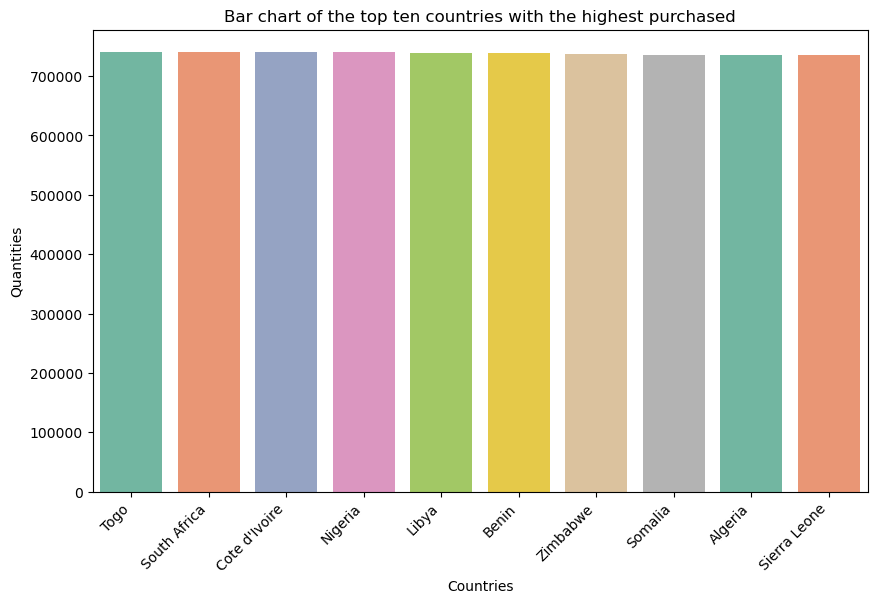

In [31]:
#visualization of the top ten countries with the highest purchased
top_ten_country = quantity_by_country.head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = 'Country', y = 'Quantity', data = top_ten_country, hue='Country', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Quantities')
plt.title('Bar chart of the top ten countries with the highest purchased')
plt.show()

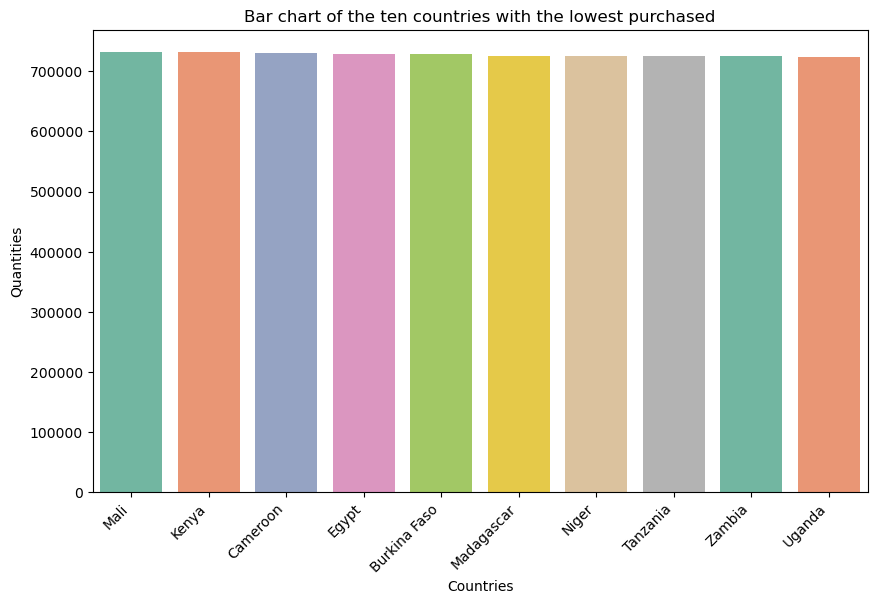

In [33]:
#visualization of the ten countries with the lowest purchased
least_ten_country = quantity_by_country.tail(10)

plt.figure(figsize = (10,6))
sns.barplot(x = 'Country', y = 'Quantity', data = least_ten_country, hue='Country', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Quantities')
plt.title('Bar chart of the ten countries with the lowest purchased')
plt.show()

### To find the number of unique customer per each country

In [53]:
#number of unique customer for each country
customer_per_country = data.groupby('Country')['CustomerID'].nunique().reset_index()
customer_per_country = customer_per_country.sort_values('CustomerID', ascending = False).reset_index()
customer_per_country

,index,Country,CustomerID
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053
3,15,Nigeria,3051
4,2,Burkina Faso,3049
5,18,Sierra Leone,3046
6,11,Mali,3044
7,0,Algeria,3043
8,17,Senegal,3040
9,14,Niger,3039


In [55]:
#to drop the old index number and leave the new index number
customer_per_country = data.groupby('Country')['CustomerID'].nunique().reset_index()
customer_per_country = customer_per_country.sort_values('CustomerID', ascending = False).reset_index(drop = True)
customer_per_country.head()

,Country,CustomerID
0,Mozambique,3072
1,Benin,3054
2,Togo,3053
3,Nigeria,3051
4,Burkina Faso,3049


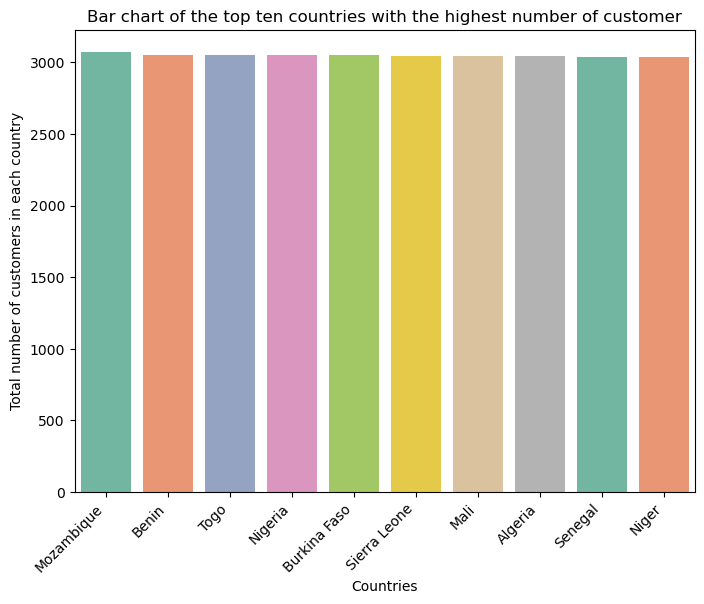

In [240]:
#visualization of the top ten countries with the highest number of customers
highest_customer_per_country = customer_per_country.head(10)

plt.figure(figsize = (8,6))
sns.barplot(x = 'Country', y = 'CustomerID', data = highest_customer_per_country, hue='Country', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Total number of customers in each country')
plt.title('Bar chart of the top ten countries with the highest number of customer')
plt.show()

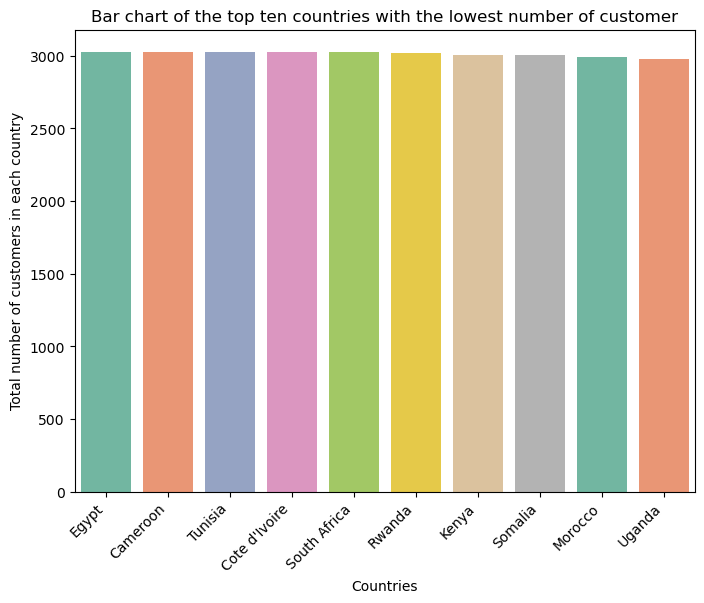

In [242]:
#visualization of the top ten countries with the lowest number of customers
lowest_customer_per_country = customer_per_country.tail(10)

plt.figure(figsize = (8,6))
sns.barplot(x = 'Country', y = 'CustomerID', data = lowest_customer_per_country, hue='Country', palette='Set2')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Countries')
plt.ylabel('Total number of customers in each country')
plt.title('Bar chart of the top ten countries with the lowest number of customer')
plt.show()

### Sales Trend Visualization for each month

In [65]:
#extracting the month 
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_sales

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

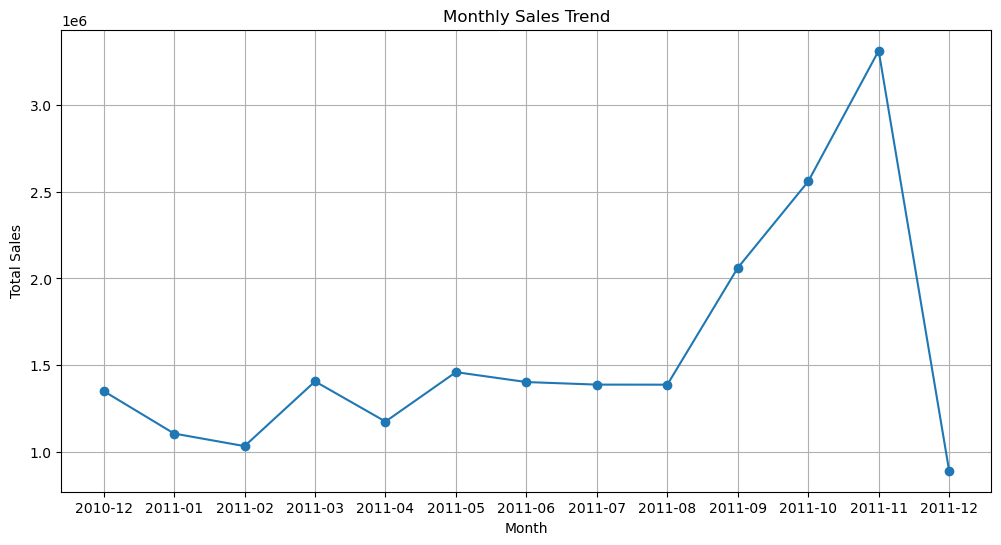

In [238]:
#creating a line graph to show the fluctuation
plt.figure(figsize = (12,6))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)
plt.show()

### Cohort Analysis

In [80]:
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [82]:
#extracting the month and year alone without the time 
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [84]:
#applying the above function we created
data['InvoiceDate'] = data['InvoiceDate'].apply(get_month)
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda


In [88]:
#creating a column to pick the first day a customer made a purchase
def get_cohort_date(data):
    data['CohortDate'] = data.groupby('CustomerID')['InvoiceDate'].transform('min')
    return data['CohortDate']

#applying the function created
data['CohortDate'] = get_cohort_date(data)
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,CohortDate
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


### Cohort Index

In [91]:
# getting the first month and first year
def get_month_and_year(data, col):
    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

#applying the function
FirstMonth, FirstYear = get_month_and_year(data, 'CohortDate')

In [93]:
FirstMonth

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: CohortDate, Length: 406829, dtype: int32

In [95]:
FirstYear

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: CohortDate, Length: 406829, dtype: int32

In [97]:
#to get the latest month and year for each of the unique customer
LatestMonth, LatestYear = get_month_and_year(data, 'InvoiceDate')

In [99]:
LatestMonth

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

In [101]:
LatestYear

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 406829, dtype: int32

In [111]:
#calculating the difference from the latest date of purchase and the first date of purchase
def create_cohort_index (FirstMonth, FirstYear, Latestmonth, LatestYear):
    year_diff = LatestYear - FirstYear
    month_diff = LatestMonth - FirstMonth
    index = year_diff * 12 + month_diff + 1
    return index

#applying the function
data['CohortIndex'] = create_cohort_index(FirstMonth, FirstYear, LatestMonth, LatestYear)

In [113]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,CohortDate,CohortIndex
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5


### Cohort Table

In [157]:
#create a dataframe that has the relevant information needed
cohort_info = data.groupby(['CohortDate', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_info.rename(columns = {'CustomerID': 'NumberOfCustomers'}, inplace = True)
cohort_info

,CohortDate,CohortIndex,NumberOfCustomers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [168]:
#creating the cohort table
cohort_table = cohort_info.pivot(index = 'CohortDate', columns = ['CohortIndex'], values = 'NumberOfCustomers')

In [170]:
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


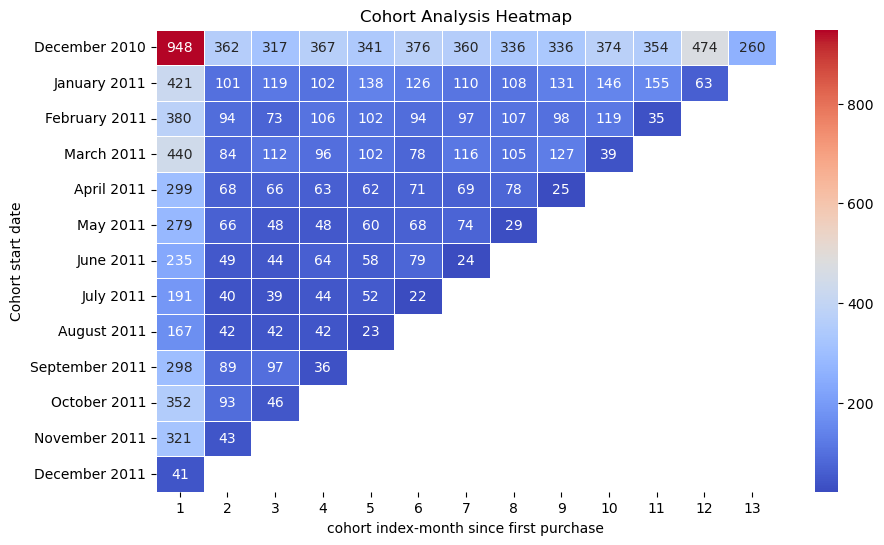

In [244]:
plt.figure(figsize = (10, 6))
sns.heatmap(cohort_table, annot = True, fmt = ".0f", cmap = "coolwarm", linewidths = 0.5)
plt.xlabel('cohort index-month since first purchase')
plt.ylabel('Cohort start date')
plt.title('Cohort Analysis Heatmap')
plt.show()

### Retention Rate

In [205]:
#to calculate the retention rate
cohort_table_new = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)

In [207]:
cohort_table_new

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


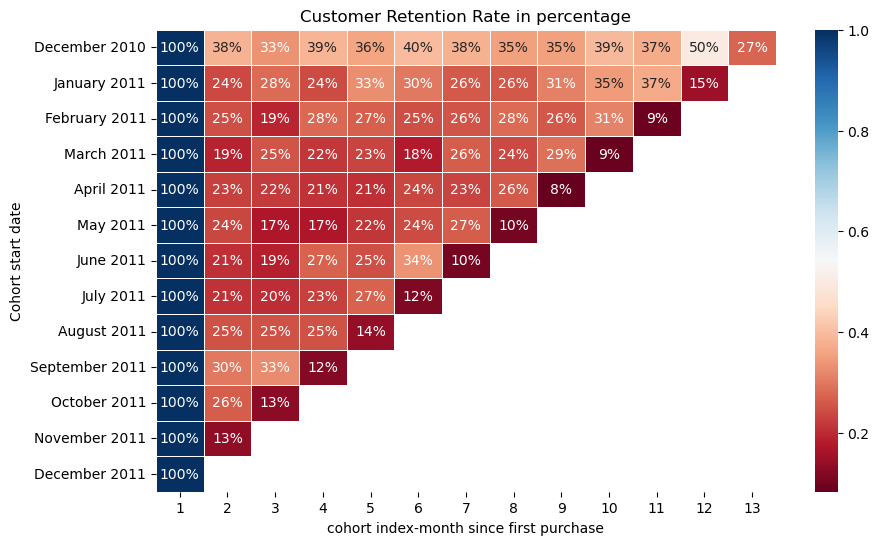

In [246]:
plt.figure(figsize = (10, 6))
sns.heatmap(cohort_table_new, annot = True, fmt = ".0%", cmap = "RdBu", linewidths = 0.5)
plt.xlabel('cohort index-month since first purchase')
plt.ylabel('Cohort start date')
plt.title('Customer Retention Rate in percentage')
plt.show()

### Quantity Bought by each cohort

In [230]:
quantity_bought = data.groupby(['CohortDate', 'CohortIndex'])['Quantity'].mean().reset_index()
quantity_bought

,CohortDate,CohortIndex,Quantity
0,2010-12-01,1,50.310391
1,2010-12-01,2,50.259443
2,2010-12-01,3,50.351084
3,2010-12-01,4,50.635290
4,2010-12-01,5,50.628518
...,...,...,...
86,2011-10-01,2,49.928081
87,2011-10-01,3,49.367144
88,2011-11-01,1,51.056094
89,2011-11-01,2,48.629340


In [232]:
#creating the cohort table
quantity_table = quantity_bought.pivot(index = 'CohortDate', columns = ['CohortIndex'], values = 'Quantity')
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortDate,,,,,,,,,,,,,
December 2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January 2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February 2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March 2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April 2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May 2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June 2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


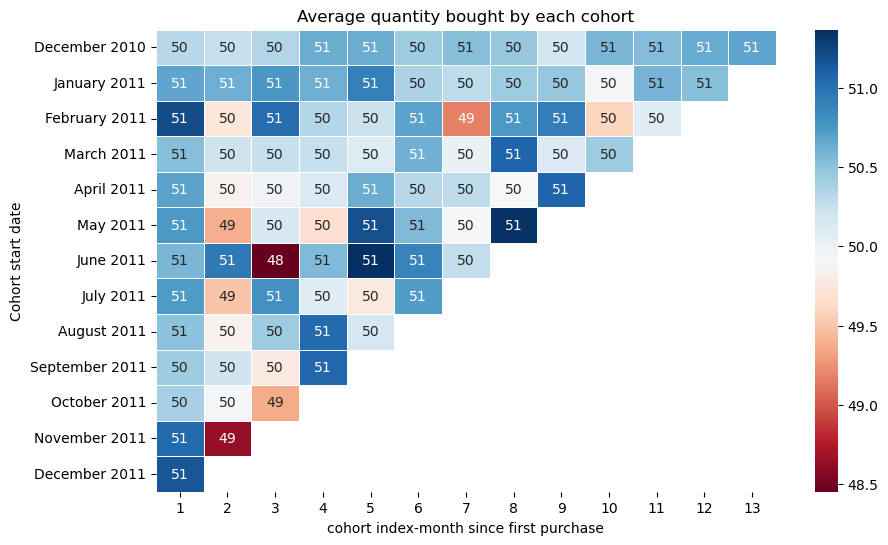

In [248]:
plt.figure(figsize = (10, 6))
sns.heatmap(quantity_table, annot = True, fmt = ".0f", cmap = "RdBu", linewidths = 0.5)
plt.xlabel('cohort index-month since first purchase')
plt.ylabel('Cohort start date')
plt.title('Average quantity bought by each cohort')
plt.show()